# **SUPPORT VECTOR MACHINE_ForestFires**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns

In [2]:
forest=pd.read_csv("forestfires.csv")

In [3]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


**EDA**

In [4]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forest.isnull().sum()


month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
forest1 = forest.copy()

In [7]:
forest1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Area')

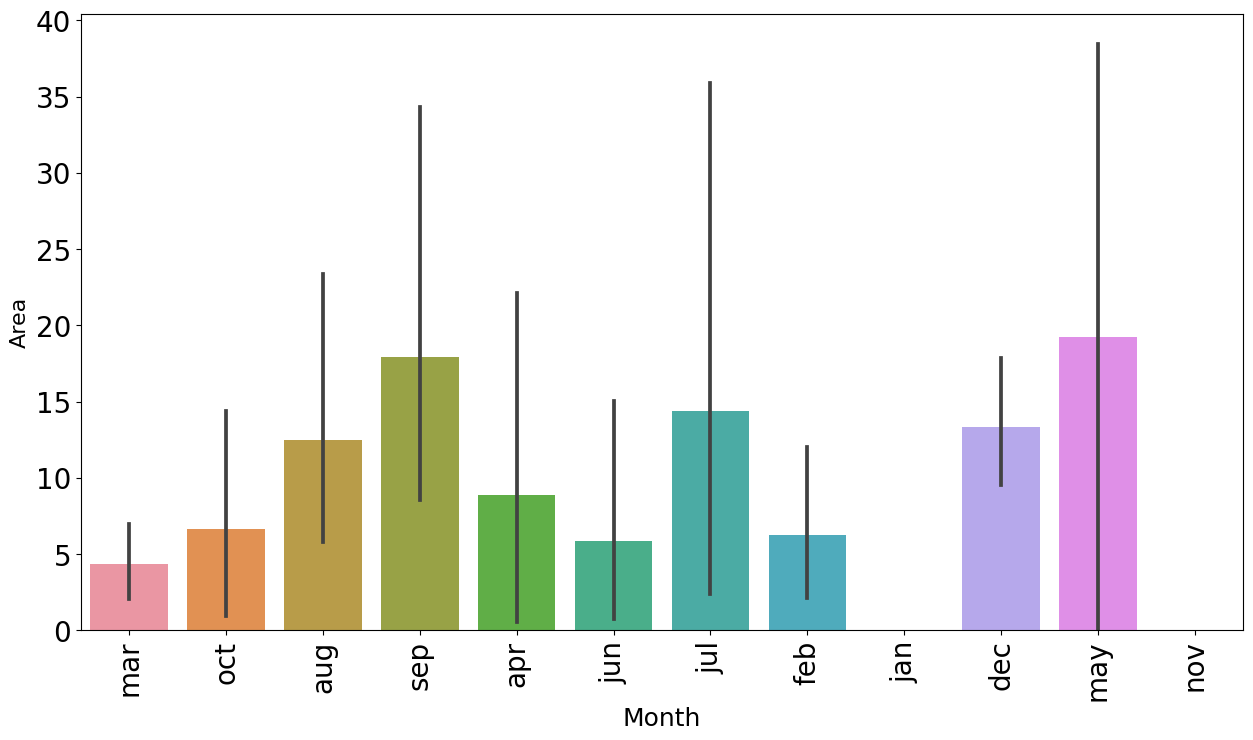

In [8]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'month', y= "area",data = forest1)
plt.xticks(rotation = 90, size = 20)
plt.yticks(size = 20)
plt.xlabel('Month',fontsize=18)
plt.ylabel('Area', fontsize=16)

Text(0, 0.5, 'Area')

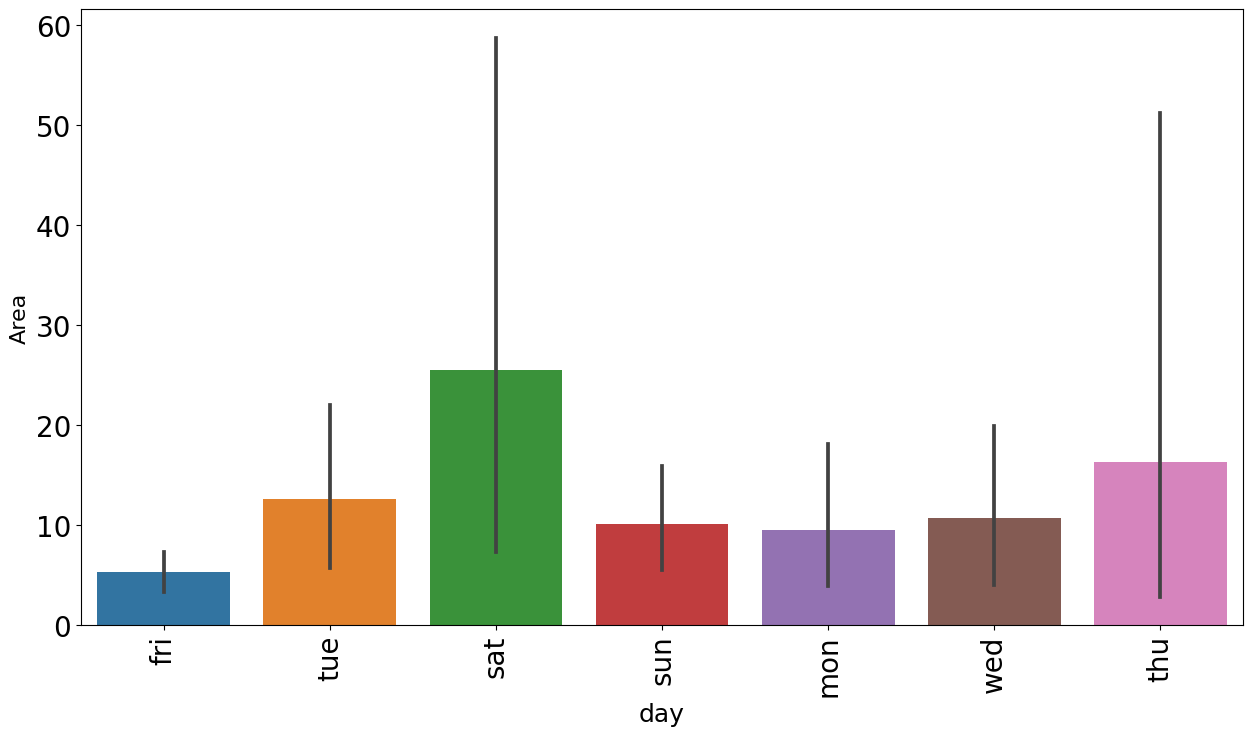

In [9]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'day', y= "area",data = forest1)
plt.xticks(rotation = 90, size = 20)
plt.yticks(size = 20)
plt.xlabel('day',fontsize=18)
plt.ylabel('Area', fontsize=16)

Text(0, 0.5, 'Area')

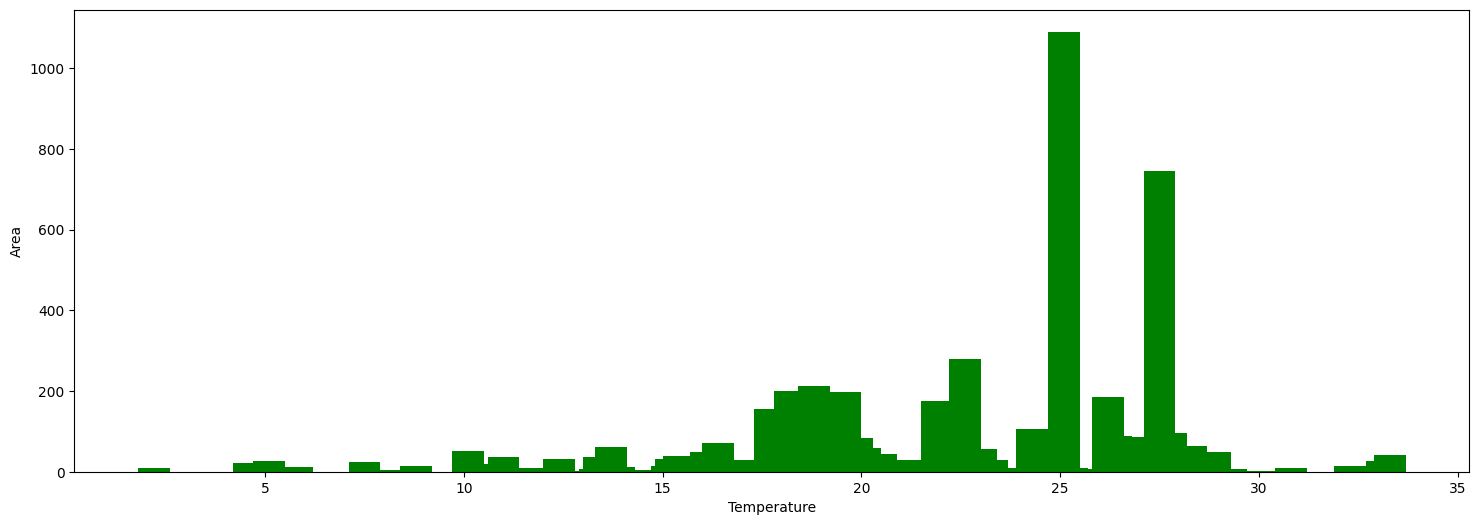

In [10]:
plt.figure(figsize=(18, 6))
plt.bar(forest1['temp'],forest1['area'], color = "green")
plt.xlabel('Temperature')
plt.ylabel('Area')

**Correlation**

In [11]:
corr = forest1.corr()

<ipython-input-11-6611ce4381b5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = forest1.corr()


<Axes: >

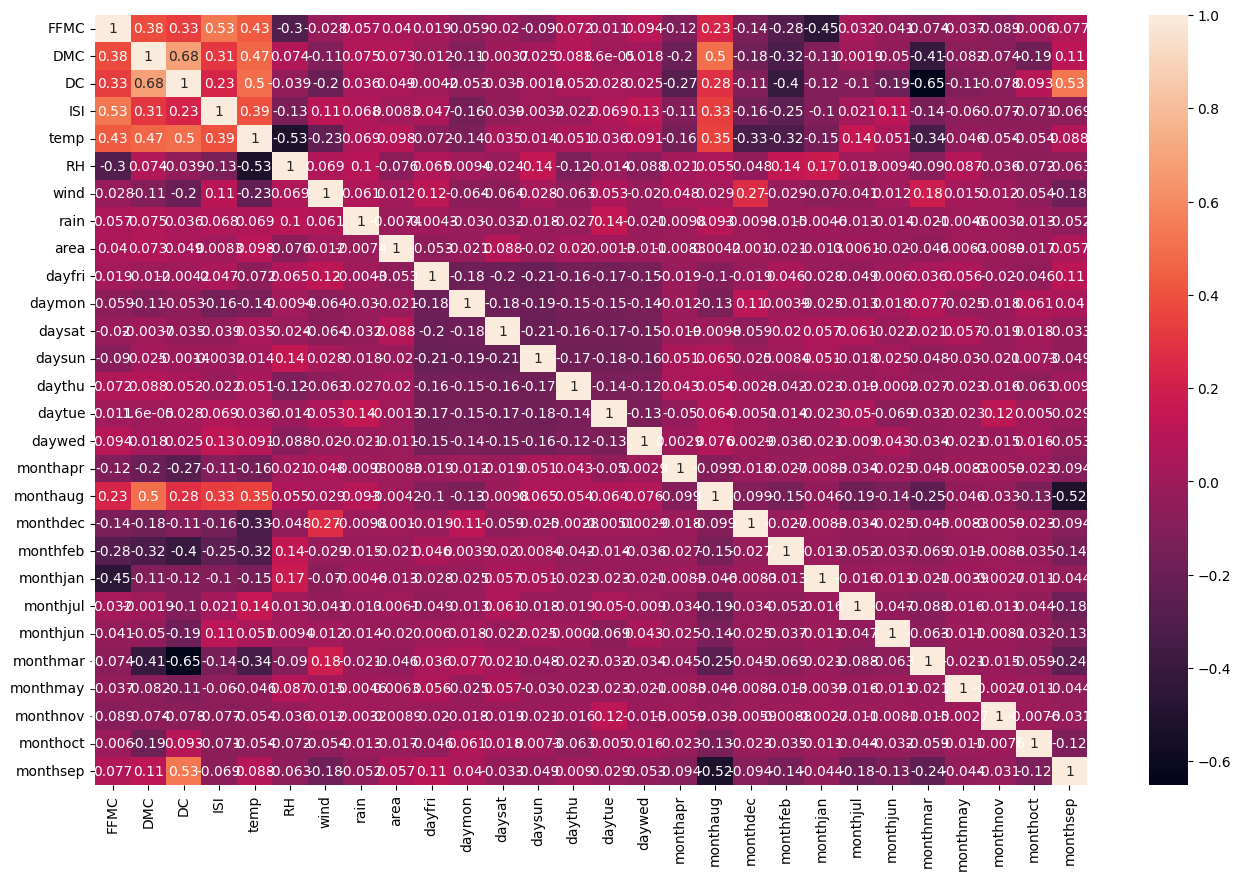

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True)

In [13]:
forest1.drop(["month","day"],axis=1,inplace =True)

In [14]:
labelencoder = LabelEncoder()
forest1.size_category = labelencoder.fit_transform(forest1.size_category)

In [15]:
forest1.head(3)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1


In [16]:
forest1["size_category"].value_counts()

1    378
0    139
Name: size_category, dtype: int64

In [17]:
X = forest1.iloc[:,0:28]
y = forest1.iloc[:,28]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, stratify = y)



**SVM Model building**

In [19]:
clf = SVC()
param_grid = {'kernel': ['rbf', 'sigmoid', 'poly','linear'], 'gamma': [1, 0.1, 0.01, 0.001],'C': [1000, 100, 10, 1],
                  'tol':[0.001,0.0008,0.0009,0.0011]}
gsv = GridSearchCV(clf,param_grid,cv=10 , n_jobs = 6, verbose = 1)
gsv.fit(X_train,y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=6,
             param_grid={'C': [1000, 100, 10, 1],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid', 'poly', 'linear'],
                         'tol': [0.001, 0.0008, 0.0009, 0.0011]},
             verbose=1)

In [20]:
gsv.best_params_ , gsv.best_score_ 

({'C': 1000, 'gamma': 1, 'kernel': 'linear', 'tol': 0.001}, 0.9895411605937922)

In [21]:
clf = SVC(C=1, gamma = 1)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 73.07692307692307


array([[ 0, 35],
       [ 0, 95]])

In [22]:
clf = SVC(kernel="linear")
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 97.6923076923077


array([[34,  1],
       [ 2, 93]])

In [23]:
clf = SVC(kernel="poly")
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 76.15384615384615


array([[ 4, 31],
       [ 0, 95]])

In [24]:
clf = SVC(kernel="rbf")
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 73.84615384615385


array([[ 1, 34],
       [ 0, 95]])

In [25]:
clf = SVC(kernel="sigmoid")
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 75.38461538461539


array([[ 3, 32],
       [ 0, 95]])

**CONCLUSION**
  Linear Model gives the best accuracy so it is a good model